In [68]:
import torch
import os
from utils.misc import list_img, unnormalize_data, visualize, normalize_data
from utils.model import Unet
from utils.transformations import get_preprocessing, get_training_augmentation
import segmentation_models_pytorch as smp
import cv2
import matplotlib.pyplot as plt
import albumentations as albu
from torchmetrics import StructuralSimilarityIndexMeasure
from torchmetrics import PeakSignalNoiseRatio

In [22]:
model = Unet(
        encoder_name='resnet34', 
        encoder_weights='imagenet', 
        encoder_depth = 5,
        classes=1, 
        activation='tanh',
        fusion=True,
        contrastive=True,
    )

/home/aditya/anaconda3/lib/python3.9/site-packages/torch/nn/init.py:403: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [67]:
dir1 = '/home/aditya/Documents/GitHub/ThermalSuperResolution/Dataset/train_val/validation/valid_VIS_HR'
dir2 = '/home/aditya/Documents/GitHub/ThermalSuperResolution/Dataset/train_val/validation/valid_input_THER_LR_bicubic/X8'
dir3 = '/home/aditya/Documents/GitHub/ThermalSuperResolution/Dataset/train_val/validation/valid_output_gt_THER_HR'
inputs1 = list_img(dir1)
inputs2 = list_img(dir2)
targets = list_img(dir3)

ssim:0.8577976226806641 psnr:28.77292251586914
(480, 640) (480, 640, 3) (480, 640, 3)


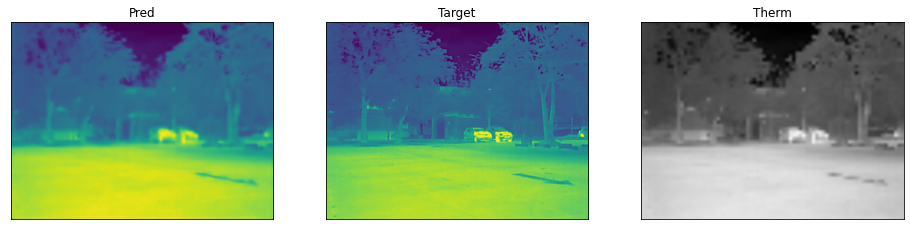

ssim:0.8913859128952026 psnr:29.3377685546875
(480, 640) (480, 640, 3) (480, 640, 3)


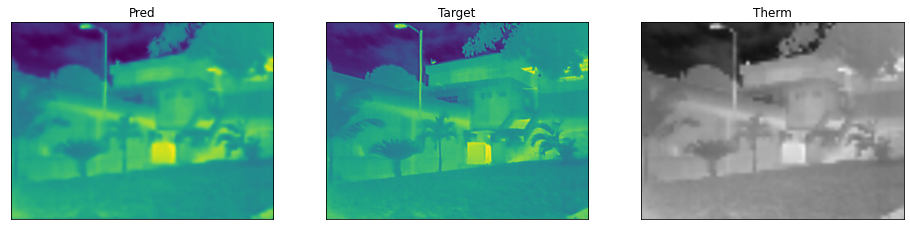

ssim:0.8712517619132996 psnr:29.691848754882812
(480, 640) (480, 640, 3) (480, 640, 3)


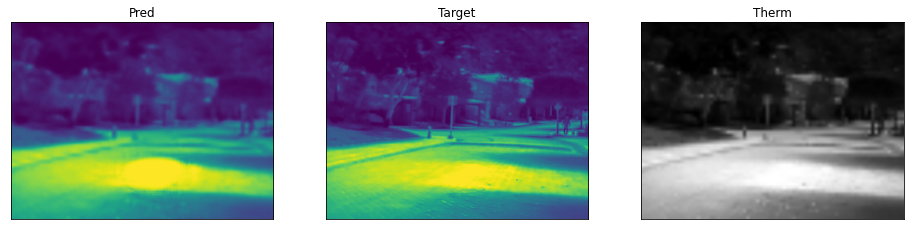

ssim:0.8380533456802368 psnr:29.965578079223633
(480, 640) (480, 640, 3) (480, 640, 3)


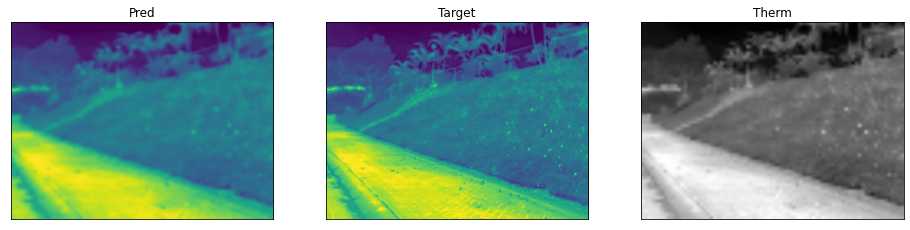

ssim:0.8439585566520691 psnr:27.860506057739258
(480, 640) (480, 640, 3) (480, 640, 3)


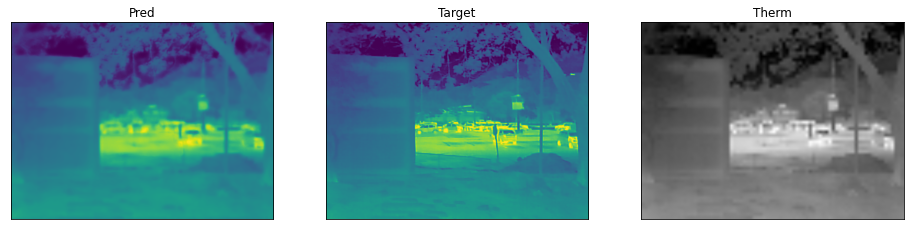

ssim:0.7701296210289001 psnr:24.904006958007812
(480, 640) (480, 640, 3) (480, 640, 3)


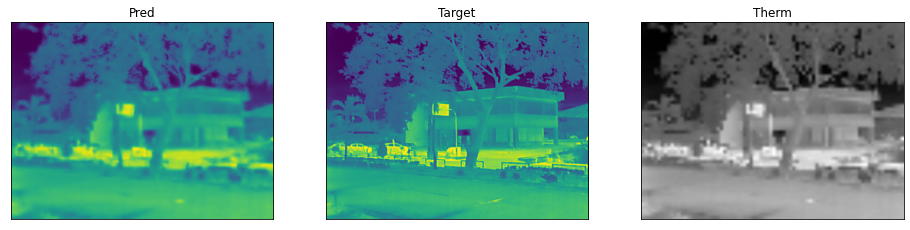

ssim:0.8589335083961487 psnr:27.81145668029785
(480, 640) (480, 640, 3) (480, 640, 3)


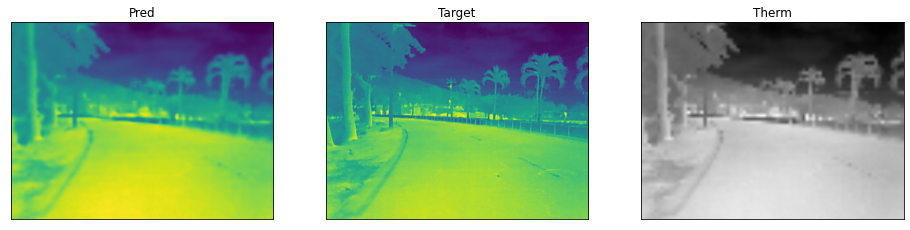

ssim:0.846962571144104 psnr:28.549596786499023
(480, 640) (480, 640, 3) (480, 640, 3)


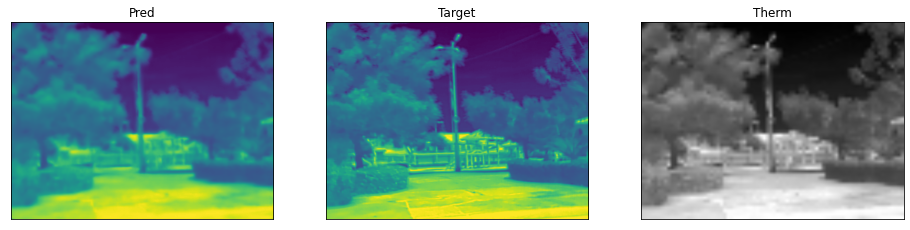

ssim:0.8169953227043152 psnr:27.511978149414062
(480, 640) (480, 640, 3) (480, 640, 3)


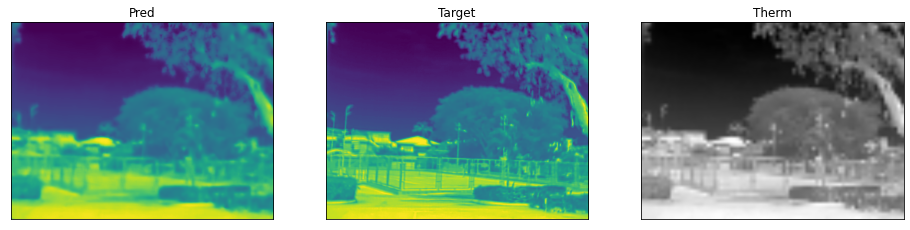

ssim:0.847866952419281 psnr:29.490140914916992
(480, 640) (480, 640, 3) (480, 640, 3)


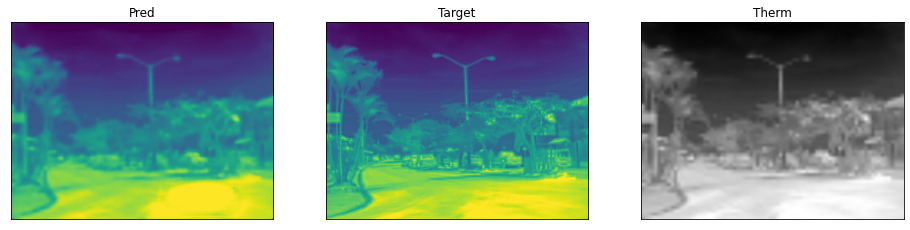

In [72]:
augmentation = get_training_augmentation()
preprocessing_fn = smp.encoders.get_preprocessing_fn('resnet34', 'imagenet')
preprocessing = get_preprocessing(preprocessing_fn)
model.load_state_dict(torch.load('/home/aditya/Documents/ThermalModels/best_model_feasible_leaf.pth', map_location=torch.device('cpu')))
model.eval()
reshape = albu.Resize(480,640)
s = StructuralSimilarityIndexMeasure()
p = PeakSignalNoiseRatio()
lst = ['evl_001','evl_002','evl_003','evl_004','evl_005','evl_006','evl_007','evl_008','evl_009','evl_010']
for ind in range(10):
    img1_ = cv2.imread(inputs1[ind])
    img1_ = cv2.cvtColor(img1_, cv2.COLOR_BGR2RGB)
    img2_ = cv2.imread(inputs2[ind])
    target = cv2.imread(targets[ind],0)
    target = target.reshape(480,640,1)
    # img1 = augmentation(image=img1_)['image']
    # img2 = augmentation(image=img2_)['image']
    # img1 = img1_
    img2_ = reshape(image=img2_)['image']
    sample = preprocessing(image=img1_, mask=target)
    img1, target = sample['image'], sample['mask']
    img2 = preprocessing(image=img2_)['image']
    target = target/255
    target = normalize_data(target)
    img1 = torch.from_numpy(img1).unsqueeze(0)
    img2 = torch.from_numpy(img2).unsqueeze(0)
    target = torch.from_numpy(target).unsqueeze(0)
    prd,_,_ = model(img1,img2)
    target = unnormalize_data(target)
    prd = unnormalize_data(prd)
    ssim = s(prd,target)
    psnr = p(prd,target)
    print(f'ssim:{ssim} psnr:{psnr}')
    prd = prd.detach().numpy().squeeze(0).squeeze(0)
    target = target.detach().numpy().squeeze(0).squeeze(0)
    # prd = (prd*255).astype('uint8')
    print(prd.shape,img1_.shape,img2_.shape)
    # plt.imshow(prd, cmap='gray')
    visualize(pred=prd, target = target, therm = img2_)
    plt.imsave('/home/aditya/Documents/GitHub/ThermalSuperResolution/Dataset/submitStructure/evaluation/x8/'+str(lst[ind])+'.bmp', prd, cmap='gray')

    

    

In [74]:
dir1 = '/home/aditya/Documents/GitHub/ThermalSuperResolution/Dataset/test_THER-LR_VIS-HR/test_VIS_HR'
dir2 = '/home/aditya/Documents/GitHub/ThermalSuperResolution/Dataset/test_THER-LR_VIS-HR/test_input_THER_LR_bicubic/X8'
inputs1 = list_img(dir1)
inputs2 = list_img(dir2)

(480, 640) (480, 640, 3) (480, 640, 3)


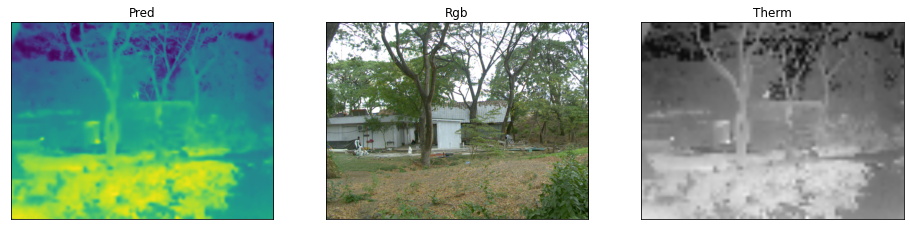

(480, 640) (480, 640, 3) (480, 640, 3)


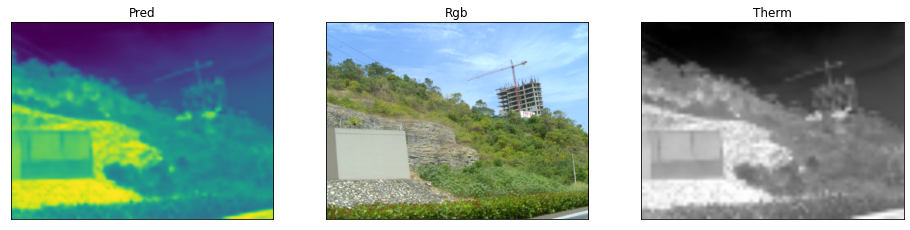

(480, 640) (480, 640, 3) (480, 640, 3)


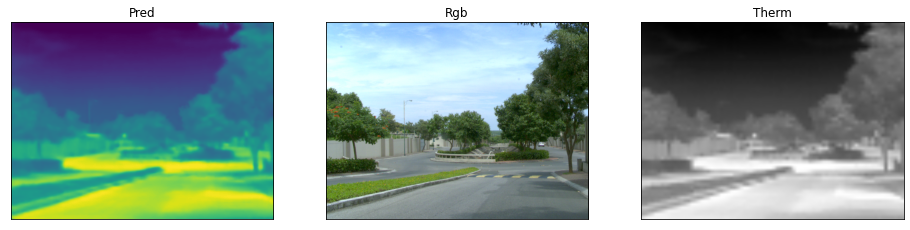

(480, 640) (480, 640, 3) (480, 640, 3)


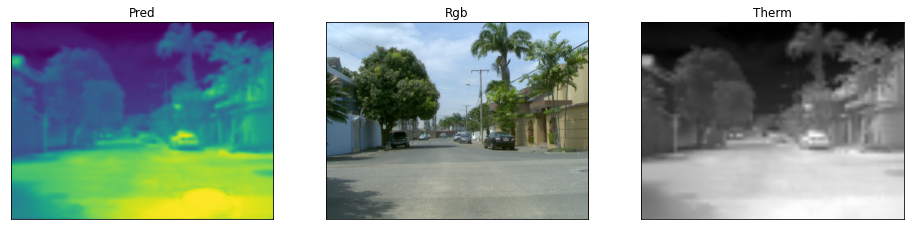

(480, 640) (480, 640, 3) (480, 640, 3)


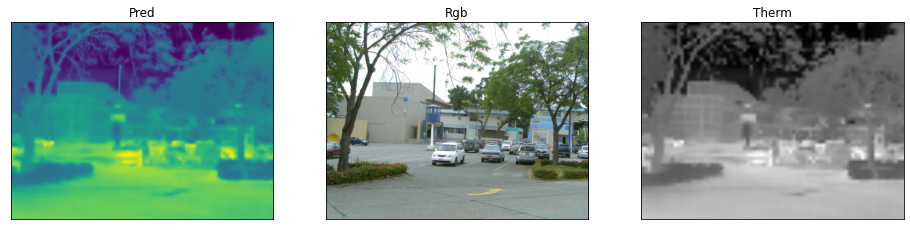

(480, 640) (480, 640, 3) (480, 640, 3)


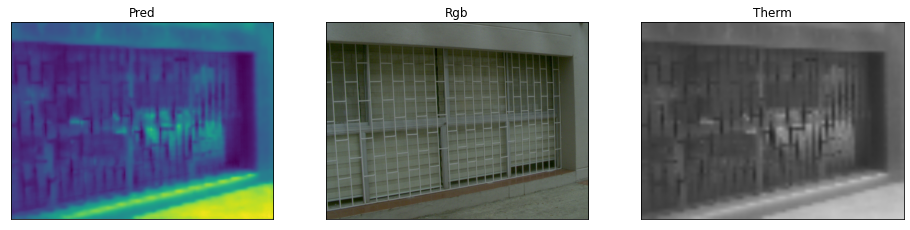

(480, 640) (480, 640, 3) (480, 640, 3)


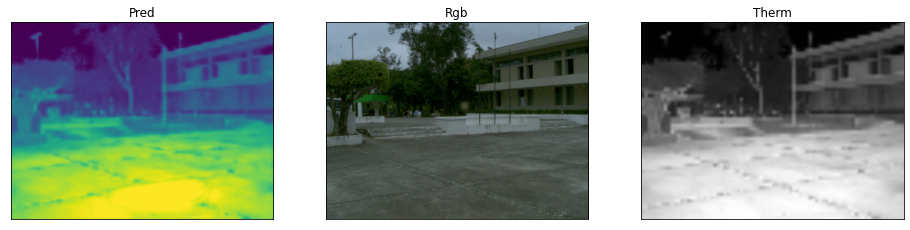

(480, 640) (480, 640, 3) (480, 640, 3)


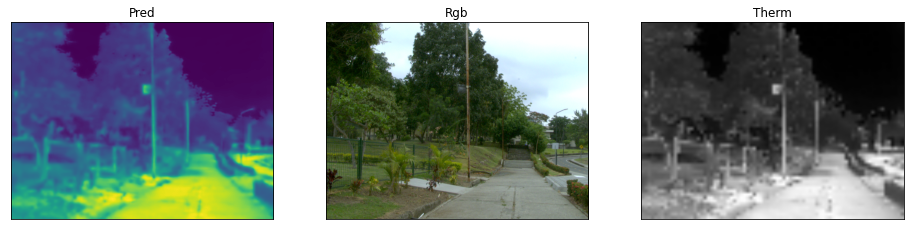

(480, 640) (480, 640, 3) (480, 640, 3)


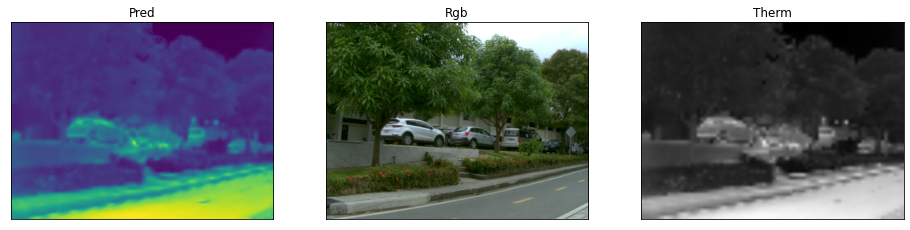

(480, 640) (480, 640, 3) (480, 640, 3)


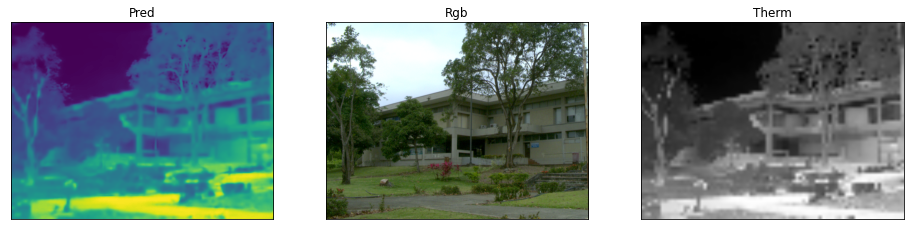

In [75]:
augmentation = get_training_augmentation()
preprocessing_fn = smp.encoders.get_preprocessing_fn('resnet34', 'imagenet')
preprocessing = get_preprocessing(preprocessing_fn)
model.load_state_dict(torch.load('/home/aditya/Documents/ThermalModels/best_model_feasible_leaf.pth', map_location=torch.device('cpu')))
model.eval()
reshape = albu.Resize(480,640)
s = StructuralSimilarityIndexMeasure()
p = PeakSignalNoiseRatio()
lst = ['evl_001','evl_002','evl_003','evl_004','evl_005','evl_006','evl_007','evl_008','evl_009','evl_010']
for ind in range(len(inputs1)):
    img1_ = cv2.imread(inputs1[ind])
    img1_ = cv2.cvtColor(img1_, cv2.COLOR_BGR2RGB)
    img2_ = cv2.imread(inputs2[ind])
    # img1 = augmentation(image=img1_)['image']
    # img2 = augmentation(image=img2_)['image']
    # img1 = img1_
    img2_ = reshape(image=img2_)['image']
    img1 = preprocessing(image=img1_)['image']
    img2 = preprocessing(image=img2_)['image']
    img1 = torch.from_numpy(img1).unsqueeze(0)
    img2 = torch.from_numpy(img2).unsqueeze(0)
    prd,_,_ = model(img1,img2)
    prd = unnormalize_data(prd)
    prd = prd.detach().numpy().squeeze(0).squeeze(0)
    # prd = (prd*255).astype('uint8')
    print(prd.shape,img1_.shape,img2_.shape)
    # plt.imshow(prd, cmap='gray')
    visualize(pred=prd, rgb = img1_, therm = img2_)
    plt.imsave('/home/aditya/Documents/GitHub/ThermalSuperResolution/Dataset/submitStructure/evaluation/x8/'+str(lst[ind])+'.bmp', prd, cmap='gray')

    

    